In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [43]:
df = pd.read_csv(f'dataset/pokemon_preprocessed.csv')

In [44]:
df = df[df['type1'].isin(['grass','fire', 'water', 'bug', 'normal', 'poison'])]

In [45]:
df.sort_values(by='name')

,name,weight_kg,height_m,attack,defense,sp_attack,sp_defense,type1
441,Abomasnow,135.5,2.2,132,105,132,105,grass
598,Accelgor,25.3,0.8,70,40,100,60,bug
171,Aipom,11.5,0.8,70,55,40,55,normal
575,Alomomola,31.6,1.2,75,80,40,45,water
405,Ambipom,20.3,1.2,100,66,60,66,normal
...,...,...,...,...,...,...,...,...
450,Yanmega,51.5,1.9,76,86,116,56,bug
714,Yungoos,6.0,0.4,70,30,30,30,normal
316,Zangoose,40.3,1.3,115,60,60,60,normal
244,Zigzagoon,17.5,0.4,30,41,30,41,normal


(array([ 77.,   0.,  50.,   0., 114.,   0.,  72.,   0., 100.,  30.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

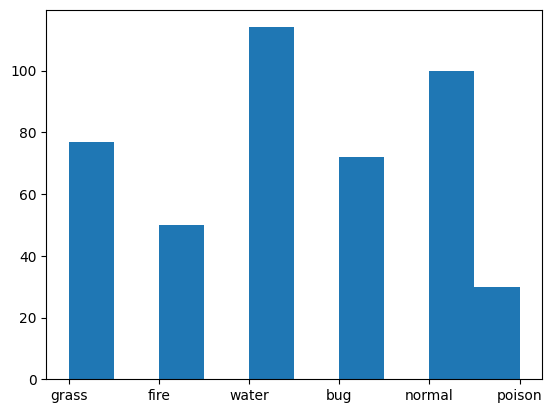

In [46]:

plt.hist(df['type1'])

In [47]:
df['type1'].isin(['grass','fire', 'water', 'bug', 'normal', 'posion'])

0      True
1      True
2      True
3      True
4      True
       ... 
765    True
766    True
772    True
773    True
776    True
Name: type1, Length: 443, dtype: bool

In [48]:
df['weight_kg']

0        6.9
1       13.0
2      100.0
3        8.5
4       19.0
       ...  
765     45.5
766     21.2
772    333.6
773     25.0
776      0.1
Name: weight_kg, Length: 443, dtype: float64

<Axes: >

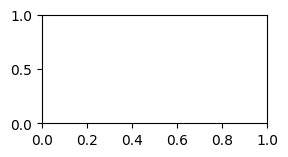

In [49]:
plt.subplot(3,2,1)

Text(0, 0.5, 'count')

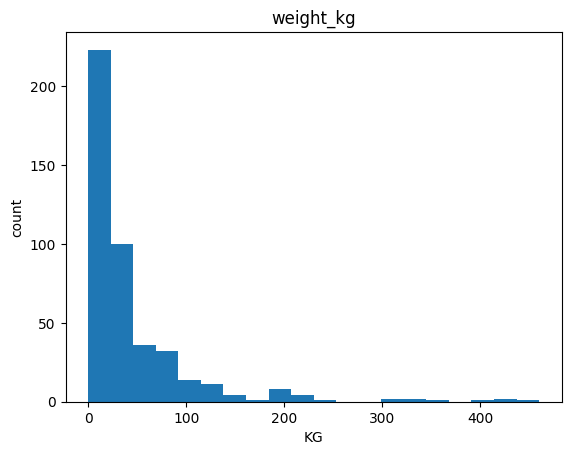

In [50]:
plt.hist(df['weight_kg'], bins = 20)
plt.title('weight_kg')
plt.xlabel('KG')
plt.ylabel('count')
#plt.savefig('weight_kg.png')

Text(0, 0.5, 'count')

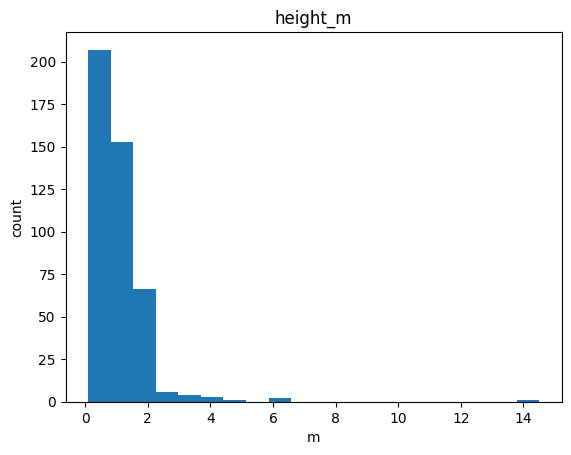

In [51]:
plt.hist(df['height_m'], bins = 20)
plt.title('height_m')
plt.xlabel('m')
plt.ylabel('count')
##plt.savefig('height_m.png')


Text(0, 0.5, 'count')

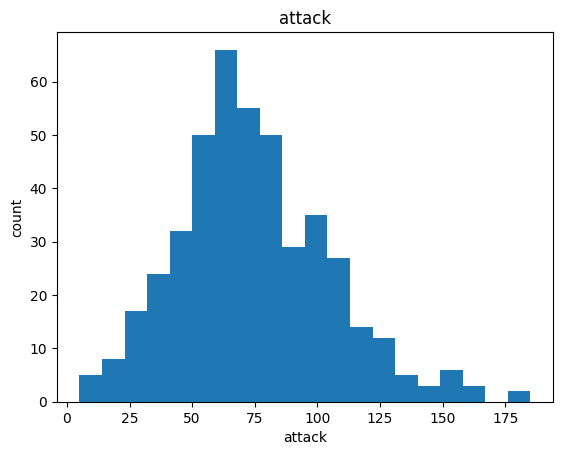

In [52]:
plt.hist(df['attack'], bins = 20)
plt.title('attack')
plt.xlabel('attack')
plt.ylabel('count')
##plt.savefig('attack.png')

Text(0, 0.5, 'count')

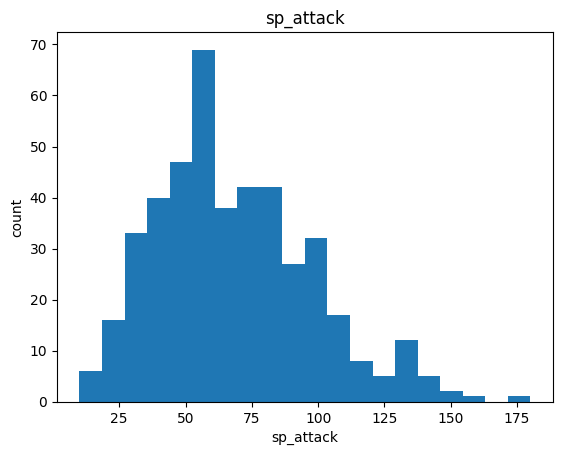

In [53]:
plt.hist(df['sp_attack'], bins = 20)
plt.title('sp_attack')
plt.xlabel('sp_attack')
plt.ylabel('count')
#plt.savefig('sp_attack.png')

Text(0, 0.5, 'count')

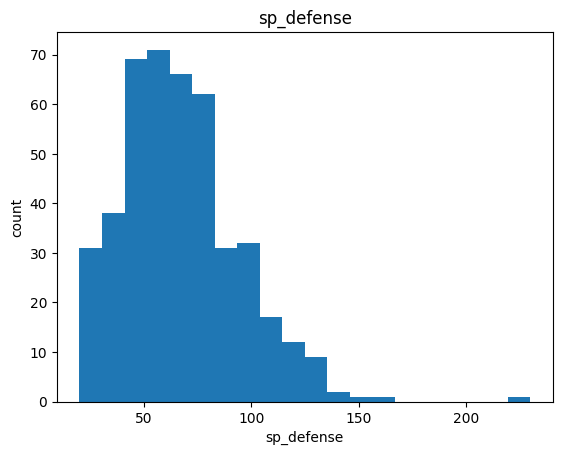

In [54]:
plt.hist(df['sp_defense'], bins = 20)
plt.title('sp_defense')
plt.xlabel('sp_defense')
plt.ylabel('count')
#plt.savefig('sp_defense.png')

Text(0, 0.5, 'count')

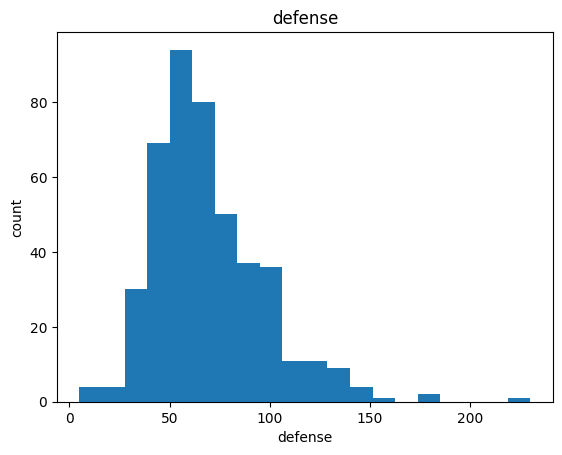

In [55]:
plt.hist(df['defense'], bins = 20)
plt.title('defense')
plt.xlabel('defense')
plt.ylabel('count')
#plt.savefig('defense.png')

In [56]:

for column in df.columns:
    if column in ['name', 'type1']:
        continue
    print(column)
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)

    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*1.5
    
    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight
    
    outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
    print(outlier_idx)
    df.drop(outlier_idx, axis=0, inplace=True)

weight_kg
Index([ 47,  72,  74, 111, 112, 124, 186, 198, 207, 211, 225, 226, 231, 270,
       301, 302, 304, 331, 363, 370, 441, 444, 446, 465, 466, 467, 474, 481,
       526, 539, 574, 621, 701, 739, 754, 758, 772],
      dtype='int64')
height_m
Index([21, 141, 317, 478, 751], dtype='int64')
attack
Index([14, 108, 193, 195, 238, 241, 776], dtype='int64')
defense
Index([65, 194, 305, 350, 451, 546, 579, 725, 727, 747, 750], dtype='int64')
sp_attack
Index([5, 639], dtype='int64')
sp_defense
Index([223, 512, 672, 731, 766], dtype='int64')


In [57]:
df.columns

Index(['name', 'weight_kg', 'height_m', 'attack', 'defense', 'sp_attack',
       'sp_defense', 'type1'],
      dtype='object')

Text(0, 0.5, 'count')

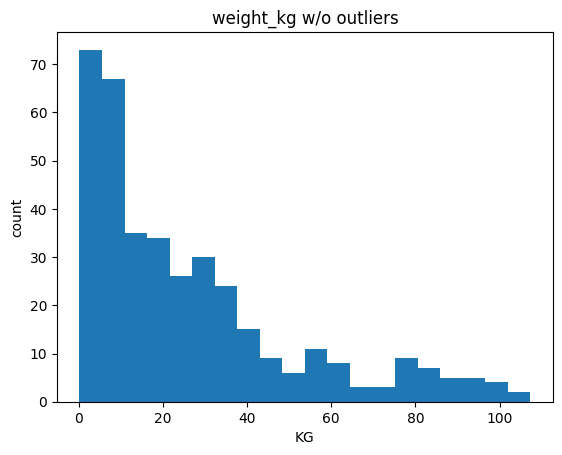

In [58]:
plt.hist(df['weight_kg'], bins = 20)
plt.title('weight_kg w/o outliers')
plt.xlabel('KG')
plt.ylabel('count')
#plt.savefig('weight_kg_without_outliers.png')

Text(0, 0.5, 'count')

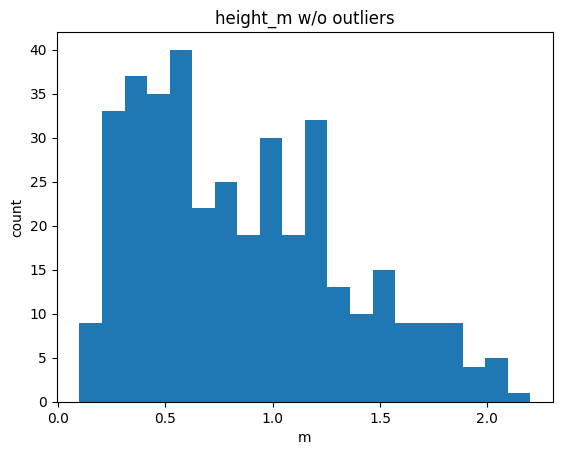

In [59]:
plt.hist(df['height_m'], bins = 20)
plt.title('height_m w/o outliers')
plt.xlabel('m')
plt.ylabel('count')
#plt.savefig('height_m_without_outliers.png')

Text(0, 0.5, 'count')

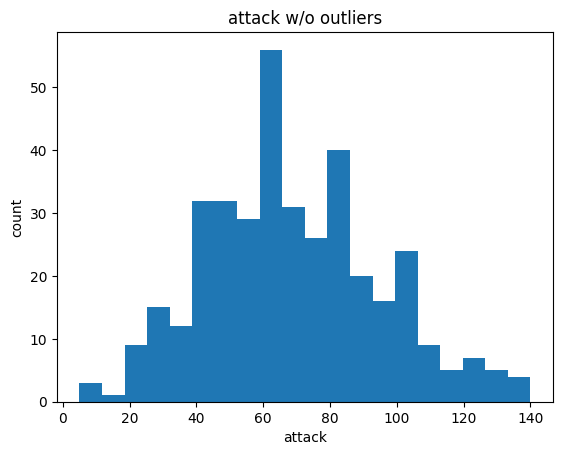

In [60]:
plt.hist(df['attack'], bins = 20)
plt.title('attack w/o outliers')
plt.xlabel('attack')
plt.ylabel('count')
#plt.savefig('attack_without_outliers.png')

Text(0, 0.5, 'count')

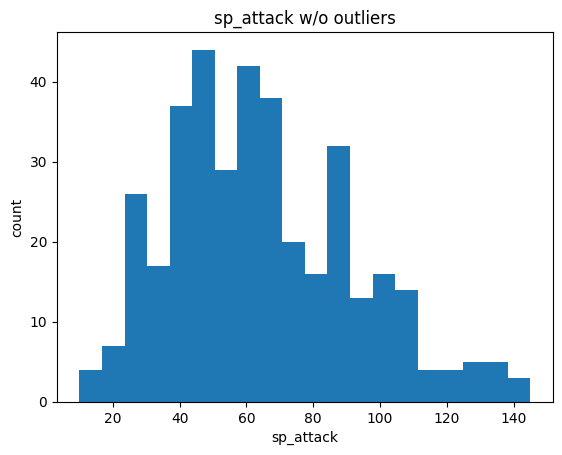

In [61]:
plt.hist(df['sp_attack'], bins = 20)
plt.title('sp_attack w/o outliers')
plt.xlabel('sp_attack')
plt.ylabel('count')
#plt.savefig('sp_attack_without_outliers.png')

Text(0, 0.5, 'count')

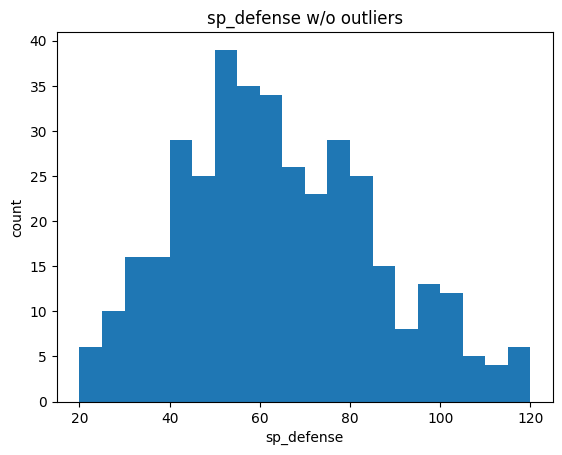

In [62]:
plt.hist(df['sp_defense'], bins = 20)
plt.title('sp_defense w/o outliers')
plt.xlabel('sp_defense')
plt.ylabel('count')
#plt.savefig('sp_defense_without_outliers.png')

Text(0, 0.5, 'count')

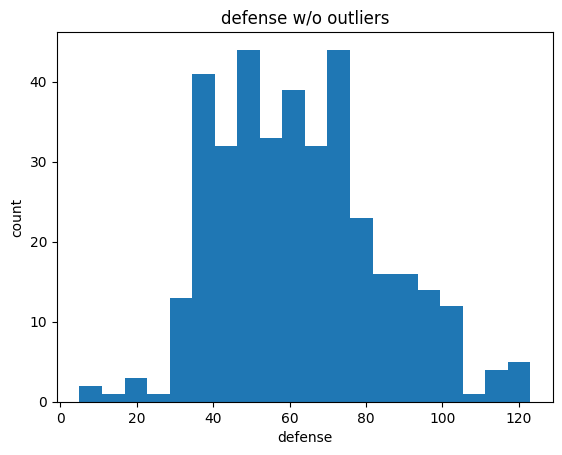

In [63]:
plt.hist(df['defense'], bins = 20)
plt.title('defense w/o outliers')
plt.xlabel('defense')
plt.ylabel('count')
#plt.savefig('defense_without_outliers.png')

In [64]:
df.to_csv('dataset/pokemon_preprocessed_without_outliers_and_small_class.csv', index=False)

In [65]:
df = pd.DataFrame(    {        "col1": ["a", "a", "b", "b", "a"],        "col2": [1.0, 2.0, 3.0, np.nan, 5.0],        "col3": [1.0, 2.0, 3.0, 4.0, 5.0]    },    columns=["col1", "col2", "col3"],)


In [66]:
df

,col1,col2,col3
0,a,1.0,1.0
1,a,2.0,2.0
2,b,3.0,3.0
3,b,NaN,4.0
4,a,5.0,5.0


In [67]:
len(df['col2'].compare(df['col3']))

1

In [68]:
import torch

In [69]:
pred = torch.rand(10,18)
target = torch.randint(0,18,(10,))

In [70]:
def cross_entropy_loss(x, y, eps = 1e-7):
    return -torch.sum(y*torch.log(x+eps))

In [71]:
def Focal__loss(x, y, gamma = 1,eps = 1e-7):
    p_t = abs(y - x) 
    return -torch.sum(((1-p_t)**gamma)*torch.log(p_t+eps))

In [72]:
target = torch.nn.functional.one_hot(target,18)

In [73]:
Focal__loss(pred,target)

tensor(117.4071)

In [74]:
PTYPE_CATEGORY = {0: 'water',
                1: 'fire',
                2: 'normal',
                3: 'poison',
                4: 'bug',
                5: 'grass',
                6: 'dark',
                7: 'flying',
                8: 'ghost',
                9: 'fighting',
                10: 'ground',
                11: 'ice',
                12: 'dragon',
                13: 'electric',
                14: 'psychic',
                15: 'rock',
                16: 'steel',
                17: 'fairy'}

reverse_category = {}
for key in PTYPE_CATEGORY.keys():
    reverse_category[PTYPE_CATEGORY[key]] = key

In [75]:
reverse_category

{'water': 0,
 'fire': 1,
 'normal': 2,
 'poison': 3,
 'bug': 4,
 'grass': 5,
 'dark': 6,
 'flying': 7,
 'ghost': 8,
 'fighting': 9,
 'ground': 10,
 'ice': 11,
 'dragon': 12,
 'electric': 13,
 'psychic': 14,
 'rock': 15,
 'steel': 16,
 'fairy': 17}

In [79]:
from transformers import CLIPTextModel, CLIPTokenizer


In [82]:
model = CLIPTokenizer.from_pretrained('xyn-ai/anything-v4.0', subfolder="tokenizer", revision=None)

In [85]:
model.add_tokens(['<CLS>'])

1

In [ ]:
input_ids = model('<CLS>high resolution, masterpiece, best quality', max_length=256, padding="max_length", truncation=True, return_tensors="pt")